<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [10]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [11]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [12]:
len(X_train)

60000

In [13]:
len(X_test)

10000

In [14]:
X_train[0].shape

(28, 28)

In [15]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

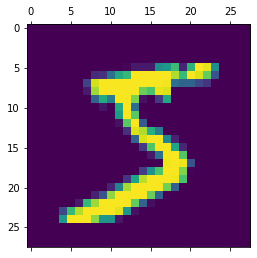

In [16]:
plt.matshow(X_train[0])

In [17]:
y_train[0]

5

In [11]:
"""X_train = X_train / 255
X_test = X_test / 255"""

In [18]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [19]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [20]:
X_train_flattened.shape

(60000, 784)

In [21]:
X_train_flattened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

<h3 style='color:purple'>Very simple neural network with no hidden layers</h3>

In [22]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
60000/60000 [==============================] - 6s 101us/sample - loss: 2.3748 - acc: 0.4419
Epoch 2/5
60000/60000 [==============================] - 5s 78us/sample - loss: 1.4072 - acc: 0.5073
Epoch 3/5
60000/60000 [==============================] - 5s 78us/sample - loss: 1.3739 - acc: 0.5232
Epoch 4/5
60000/60000 [==============================] - 5s 77us/sample - loss: 1.3412 - acc: 0.5293
Epoch 5/5
60000/60000 [==============================] - 5s 76us/sample - loss: 1.3428 - acc: 0.5259


In [23]:
model.evaluate(X_test_flattened, y_test)

10000/10000 [==============================] - 1s 66us/sample - loss: 1.3923 - acc: 0.5821


[1.3923146502494812, 0.5821]

In [24]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

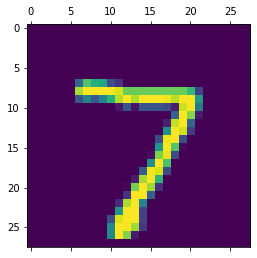

In [25]:
plt.matshow(X_test[0])

**np.argmax finds a maximum element  from an array and returns the index of it**

In [26]:
np.argmax(y_predicted[0])

7

In [27]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [28]:
y_predicted_labels[:5]

[7, 0, 1, 0, 4]

In [29]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor 'confusion_matrix/SparseTensorDenseAdd:0' shape=(10, 10) dtype=int32>

In [31]:
cm.shape

TensorShape([Dimension(10), Dimension(10)])

In [32]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

ValueError: Must pass 2-d input

<Figure size 720x504 with 0 Axes>

<h3 style='color:purple'>Using hidden layer</h3>

In [33]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 87us/sample - loss: 2.2080 - acc: 0.2419
Epoch 2/5
60000/60000 [==============================] - 5s 86us/sample - loss: 1.9356 - acc: 0.2766
Epoch 3/5
60000/60000 [==============================] - 5s 86us/sample - loss: 1.6938 - acc: 0.4049
Epoch 4/5
60000/60000 [==============================] - 5s 86us/sample - loss: 1.5899 - acc: 0.4444
Epoch 5/5
60000/60000 [==============================] - 5s 88us/sample - loss: 1.5429 - acc: 0.4111


In [34]:
model.evaluate(X_test_flattened,y_test)

10000/10000 [==============================] - 1s 59us/sample - loss: 1.4552 - acc: 0.4180


[1.4551581958770752, 0.418]

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [37]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

ValueError: Must pass 2-d input

<Figure size 720x504 with 0 Axes>

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [59]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2959 - accuracy: 0.9185
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1368 - accuracy: 0.9603
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0995 - accuracy: 0.9703
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0771 - accuracy: 0.9772
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0628 - accuracy: 0.9806
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0519 - accuracy: 0.9841
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0442 - accuracy: 0.9865
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0369 - accuracy: 0.9886
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0300 - accuracy: 0.9910
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.026

In [60]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0813 - accuracy: 0.9779


[0.08133944123983383, 0.9779000282287598]